In [1]:
from IPython.display import Image, HTML
import answers
import os
import pandas as pd

# Biology Meets Computer Science

## Table of Contents:

  #### Part 1: How We Read the Geome
  #### Part 2: Looking at Your Data
  #### Part 3: Prepare Your Data
  #### Part 4: Getting Results
  #### Part 5: Reaching a Conclusion

## Please post questions in the chat!

## Part 1: How We Read the Genome

Recent decades have led to incredible advancements in both the rate and accuracy of data generation. This section will show you how modern technology has vastly changed the way genomic data can be recorded.

#### Sanger Sequencing

In [2]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/6ldtdWjDwes" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

The video discusses how sanger sequencing allows the strand to be assembled like a puzzle. To see the pieces of this puzzle, a techinque called Gel Electrophoresis is used. Gel Electrophoresis moves molecules through an agar gel using an electric current.  The rate the molecules move is dictated by their size -- smaller molecules move faster and will end up closer to the positive end of the gel. Because of this, by taking a fragment of DNA or RNA, copying it, then chopping it up into smaller pieces and sorting them into rows based on which nucleic acid is at the end, the sequence can be discovered.

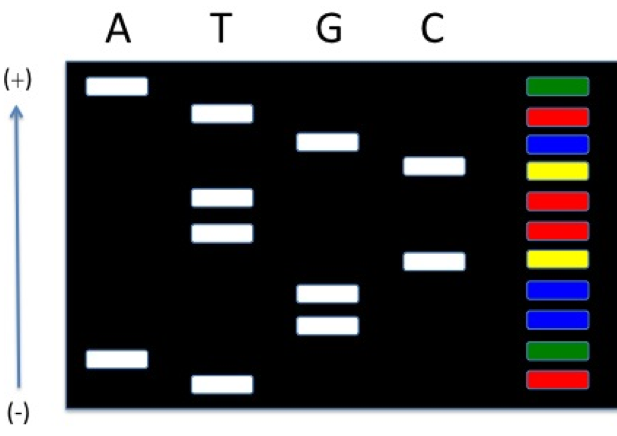

In [3]:
Image(filename='./images/sanger1.png') 

What is the sequence shown in the image above?

In [ ]:
answers.q1("")

#### Lets try a couple more:

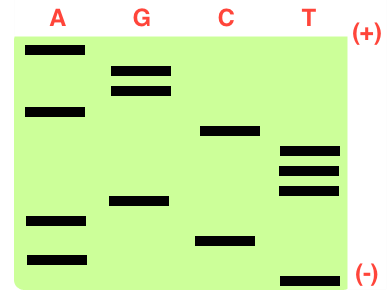

In [4]:
Image(filename='./images/sanger2.png') 

In [ ]:
answers.q2("")

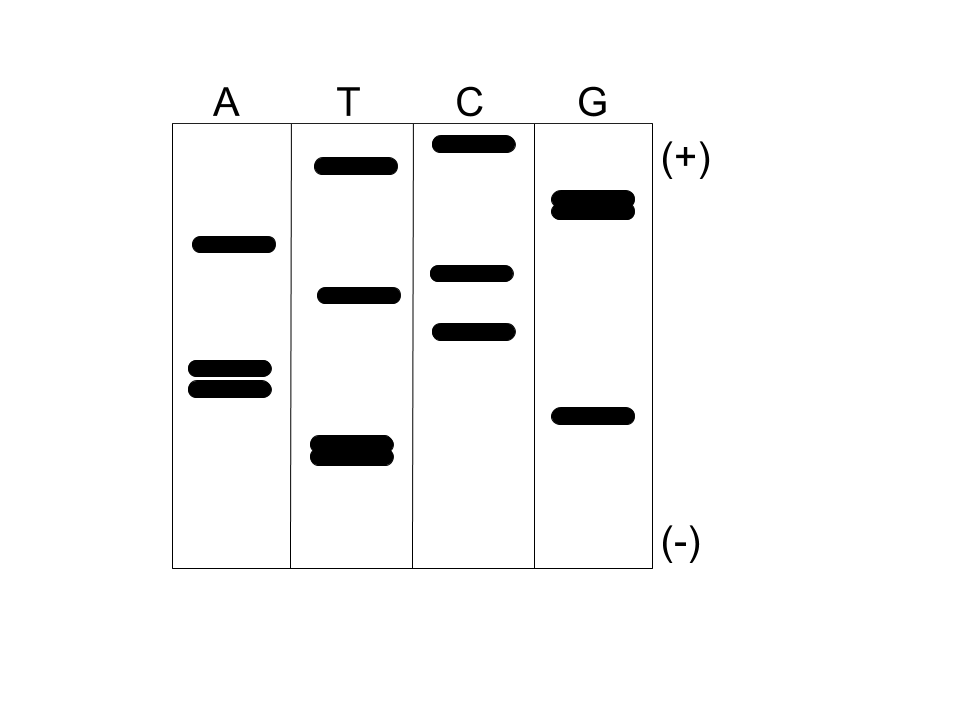

In [5]:
Image(filename='./images/sanger3.png') 

In [ ]:
answers.q3("")

#### Modern Sequencing

Though Sanger sequencing still has applications, it is not as widely used anymore. More modern techniques allow thousands of strands to be sequenced simultaneously. Furthermore, whereas older methods forced researchers to use exceedingly small fragments of the full sequence, newer techniques allow for a much longer fragment to be analyzed. The two most popular methods of sequencing come from the companies **Illimuna** and **Pacific BioSciences** (PacBio).

Illumina sequencing amplifies the number of reads and sequences them in shorter (~200-500 bp) fragments, but does many thousands of these fragments simultaneously, and reading multiple fragments from the same place, creating what is known as "high sequence depth". This increases accuracy of the reads, and allows larger datasets to be generated.

In [6]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/fCd6B5HRaZ8?start=135" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

PacBio takes an alternantive approach, called SMRT (single molecule, real-time) sequencing. By using longer strands. turning them into a loop and running dna polymeraze along it, much longer (up to 75,000 bp) sequences can be read at once. While the accuracy of any individual base is often lower in PacBio data than in Illumina data, the longer fragments allow for a much simpler assembly and mapping of reads later on.

In [7]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/v8p4ph2MAvI?start=135" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Part 2: Looking at Your Data

You've now sequenced your reads, and it's time to see how well your data came out. Here is what one of the **fastq** files that came back from the sequencer looks like:

In [8]:
with open("data/DL.fq",  "r") as f:
    for x in range(0,12):
        line = f.readline().strip()
        print(line)

@SRR1552454.1 DCV4KXP1:223:C2CTUACXX:2:1101:1469:2188 length=100
GAAATACAGAACCTGTTGATGTTGATATCTGTGCTCAGCTATGTAGCATCTTTCTCTCTGTTAAGCCTGGTCAACATTAACCCAATGAAATGATTTGAAG
+SRR1552454.1 DCV4KXP1:223:C2CTUACXX:2:1101:1469:2188 length=100
B@@FFFFFHHHHHJJJJJIIJGIJIIIIJJJJGGIJGIIJJJJJJJJIIIJJJIJJJIJJJJJIIIJJJJJJJJJGHIJAGIHHHHFFFFFFEEEEEDED
@SRR1552454.2 DCV4KXP1:223:C2CTUACXX:2:1101:1435:2189 length=100
GGACAAGCCATGCCAAAGCCAAGGCAGAGGCAGCAGAACAGGCTGCCCTGGCTGCCAACCAGGAGTCCAACATCGCCCGTACATTGGCCAAGGAGCTGGC
+SRR1552454.2 DCV4KXP1:223:C2CTUACXX:2:1101:1435:2189 length=100
CCCFFFFFHHHHHJJJJJIJJJJJJIJIJJJGGIJJJJJJJJJJIIJJJJJJJJIJEHHHGFFFDAEECEDD?CBB?B@;>B?CDCDDDABBDBBBBDDD
@SRR1552454.3 DCV4KXP1:223:C2CTUACXX:2:1101:1549:2196 length=100
GAAATCCTTTCAAAATAGTGTTATTAACCTGATTAAAGAACTGCAAATAAAATCAAGCTGTAACTGCCCAGAATTCCATTTAAGTTACAGCCTGATTTTA
+SRR1552454.3 DCV4KXP1:223:C2CTUACXX:2:1101:1549:2196 length=100
@@@FFEFFHHHFGJJJJFJJGHGGJGIFHHAG>HIIGFEIJJ@?DGD??FCH9*9*9?DB?<D:B=<=CGECH@D;=A>EGAA).=33@;B9?66;CEE;


#### Question: What do the lines in the fastq files represent?
A: Sequencer contact information, Sequence, Strand direction, Quality score

B: Read/sequencer info, Sequence, Spacer, Quality score

C: Read/sequencer info, Quality score, Strand Direction, Sequence

D: Read database id for searching, Sequence, Spacer, Quality

In [ ]:
answers.q4("")

Now we can use some command line tools to see if the data is of good quality.

In [ ]:
!fastqc data/*.fq -o data/fastqc
!multiqc -o data/multiqc data/fastqc/*_fastqc.zip

In [ ]:
HTML('<iframe src=./data/multiqc/multiqc_report.html width=100% height=650></iframe>')

In general, the data seems of ok quality, however the adapter sequences for the illumina system these data are still attached and must be removed for proper ananlysis. Furthermore, poor sequence quality near the start of the read suggests trimming would also be necessary.

#### Question: Which file has the most duplicate reads?

In [ ]:
answers.q5("")

## Part 3: Prepare Your Data

With the sequenced reads, quantitative anlysis can almost begin. First, the data needs to be prepared and standardized. **Cutadapt** is a tool that can help. It will do 3 things in this case:

1. Remove the adapter sequences identified above
2. Remove bad quality reads
3. Remove too short reads


In [ ]:
!for file in data/*.fq; do cutadapt -a AGATCGGAAGAGCACACGTCTGAACTCCAGTCAC -u 20 -O 20 -q 20 -m 80 --quiet -o $file.out $file; done;

With that one command, all of the data has been trimmed and filtered. Let's take another look

In [ ]:
!fastqc -o data/fastqc data/*.fq.out
!multiqc -n trimmedreads -o data/multiqc data/fastqc/*out_fastqc.zip

In [ ]:
HTML('<iframe src= data/multiqc/trimmedreads.html width=100% height=650></iframe>')

## Part 4: Getting Results

Now we need to convert this:

In [ ]:
with open("data/DL.fq.out",  "r") as f:
    for x in range(0,4):
        line = f.readline().strip()
        print(line)

into something like this:

In [ ]:
Image(filename='./images/count_matrix.png') 

This is called a counts matrix. It lists all of the genes identified in the data and tells the number of reads came from that gene. The process of associating the reads from your file to the established genes of a give species is known as **mapping** or **aligning**.

Because this can be a slow and computationally expensive process, the mapping has been performed for you using a tool called **HISAT2**.

The file returned here is not the final counts file but  instead a "Sequence Alignment/Map" or **SAM** file, an example of which is shown below

readID43GYAX15:7:1:1202:19894/1 &emsp; 256 &emsp;   contig87  &emsp;  540849 &emsp;   1  &emsp;  65M &emsp;   *  &emsp;  0  &emsp;  0 &emsp;   CCTGCACGAACGAAATCCGCATGCGTCTGGTCGTTGTACGGAACGGCGGTTGTGTGACGAACGGC &emsp;   EDDEEDEE=EE?DE??DDDBADEBEFFFDBEFFEBCBC=?BEEEE@=:?::?7?:8-6?7?@??# &emsp; AS:i:0 &emsp;  XS:i:0 &emsp; XN:i:0 &emsp;  XM:i:0 &emsp; XO:i:0 &emsp; XG:i:0 &emsp;  NM:i:0 &emsp;   MD:Z:65  &emsp;  YT:Z:UU

Each part of the above string represents somehting important about a given read that has been associated with a gene at a location in the referece data:

QNAME&emsp;FLAG&emsp;RNAME&emsp;POS&emsp;MAPQ&emsp;CIGAR&emsp;RNEXT&emsp;PNEXT&emsp;TLEN&emsp;SEQ&emsp;QUAL&emsp;TAGS

Translated, these correspond to:

1. QNAME: Query template NAME. Reads/segments having identical QNAME are regarded to come from the same template. A QNAME ‘\*’ indicates the information is unavailable. In a SAM file, a read maoccupy multiple alignment lines, when its alignment is chimeric or when multiple mappings are given.


2. FLAG: Combination of bitwise flag values denoting various information about the mapped sequence


3. RNAME: Reference sequence name of the alignment.


4. POS: 1-based leftmost mapping Position


5. MAPQ: Mapping quality


6. CIGAR: String denoting the relationship between the reference sequece and the mapped read


7. RNEXT: Reference sequence name of the primary alignment of the NEXT read in the template.


8. PNEXT: 1-based Position of the primary alignment of the next read in the template


9. TLEN: signed observed Template length


10. SEQ: Segment sequence


11. QUAL: Segment quality scores


12. TAGS: Extra information about the aligned sequence

Now that the sequences have been aligned, the locations for each read has been established. Now the locations need to be associated with a gene and a counts table generated. For that, we use the tool **featureCounts**. To avoid requiring large reference data to be downloaded, this has also been performed for you. You can see some of the data below.

In [ ]:
pd.read_csv("./data/counts_table.tsv", sep = "\t", index_col = 0)

## Part 5: Making the Data Meaningful

As mentioned before, a higher gene count number shows a highly expressed gene, but not necessarily that the gene is expressed more or less in a given experiment -- some genes are inherently expressed more or less. For that reason, this table must be **normalized** and then analyzed for **differentially expressed genes**.

This notebook has been working in the laguage **Python** and occasionally **Bash**, two of the major programming languages in a bioinformatician's toolkit. Now it is time to switch over to one of the other big languages, **R**.

Please exit this notebook and open the file **UT_Dallas_demo_p2.ipynb**.